In [1]:
 using Plots, PlotRecipes
pyplot()
using LaTeXStrings;
using TaylorSeries
using DataFrames

    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /Users/usuario/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.DataArray, AbstractArray) at /Users/usuario/.julia/v0.4/DataArrays/src/operators.jl:276.
To fix, define 
    +(DataArrays.DataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.
    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /Users/usuario/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.AbstractDataArray, AbstractArray) at /Users/usuario/.julia/v0.4/DataArrays/src/operators.jl:300.
To fix, define 
    +(DataArrays.AbstractDataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.


# Mapeo de Hénon

## Mapeos en 2D
### Estabilidad de puntos fijos

Un mapeo en dos dimensiones se puede caracterizar, al igual que un mapeo en una dimensión, con la estabilidad de sus puntos fijos, sus órbitas periódicas y otras propiedades que dependen de los parámetros del mapeo. 

Sea $f(\vec{x},\alpha)$ un mapeo en dos dimensiones, con $ \vec{x}=(x,y)$  y $\alpha$ un conjunto de parámetros de los que depende el mapeo.

Los puntos fijos serán aquellos que satisfagan

$$f(\vec{x}^*,\alpha)=\vec{x}^*$$

Para mapeos lineales de la forma 

$$f(\vec{x})=A\vec{x}$$  (con A una matriz de $2\times2$) se tiene que sus puntos fijos son los que satisfacen 

$$A\vec{x}^*=\vec{x}^*$$

ó bien 

$$ (A-I)\vec{x}^*=0$$

Si $(A-I)$ es no singular, entonces $\vec{x}^*$ es el unico punto de equilibrio del sistema, pero si $(A-I)$ es singular, hay una familia de puntos de equlibrio. En tal caso se define

$$\vec{y}=\vec{x}-\vec{x}^*$$ 

y se obtiene un nuevo mapeo 

$$f_y(\vec{y})=A\vec{y}$$ 
cuyos puntos de equlibrio satisfacen

$$\vec{y}^*=A\vec{y}^*$$

Así las ropiedades de estabilidad de un punto de equilibrio $\vec{x}^*\neq 0 $son las mismas que las de un punto de equilibrio $\vec{x}=0$. Sea

$$J=P^{-1}AP$$

la forma canónica de Jordan de A. Sea también 

$$\vec{y}=P^{-1}\vec{x}$$

Entonces el sistema original se transforma a 

$$f_y(\vec{y})=J\vec{y}$$ 


Hay tre posibles formas canónicas de Jordan que se pueden tener, como vimos en clase. Estas formas son:
\begin{equation*}
\left( 
\begin{array}{cc}
\alpha & -\beta \\
\beta & \alpha 
\end{array} 
\right), 
\left( 
\begin{array}{cc}
\lambda & 1 \\
0 & \lambda 
\end{array} 
\right),
\left( 
\begin{array}{cc}
\lambda & 0 \\
0 & \mu
\end{array} 
\right),
\end{equation*}
donde $\alpha, \beta, \lambda$ y $\mu$ son reales, con $\beta\ne 0$ y $\mu\ne\lambda$. En esta forma, los elementos de la diagonal son los eigenvalores, excepto para la primer matriz, cuyos eigenvalores son $\alpha\pm i \beta$.

Para el caso general en que el mapeo $f(\vec{x},\alpha)$ no es lineal, se puede linealizar con la matriz jacbiana $J_b$ y así estudiar localmente el comportamiento alrededor de los puntos fijos del mapeo.

Por ahora estudiemos el caso en el que los eigenvalores son dos reales distintos. 

Cuando se tienen dos eigenvalores reales distintos, los puntos fijos pueden ser:

- Puntos fijos aasíntoticamente estables: $\lambda_1\lt\lambda_2\lt1$
- Puntos fijos  inestables: $\lambda_1\gt\lambda_2\gt1$
- Puntos fijos silla: $0 \lt \lambda_1 \lt 1, \lambda_2\gt1$
- Puntos fijos degenerados: $\lambda_1=1, \lambda_1 \gt \lambda_2$
- Punto fijo estable:$-1\lt\lambda_1\lt 0 \lt\lambda_2\lt1$
- Punto fijo estable: $-1\lt\lambda_1\lt\lambda_2\lt0$
- Punto fijo silla: $\lambda_1\lt -1 \lt \lambda_2 \lt 0$
- Punto fijo silla: $\lambda_1\lt -1$ y  $ 0\lt\lambda_2 \lt 1$
- Punto fijo silla: $-1\lt\lambda_1\lt 0$ y  $ 1\lt\lambda_2$

Nota: Los puntos fijos silla son inestables.

Esto lo usamos  para estudiar los puntos fijos del  **mapeo clásico de Hénon** que  está definido por 

$$ \begin{array}{cc}
x_{n+1}=& 1-ax^2_n+y_n \\
y_{n+1}= & bx_n 
\end{array} $$


La matriz jacobiana de este mapeo es:

\begin{equation*}
J_b=\left( 
\begin{array}{cc}
-2ax & 1 \\
b & 0 
\end{array} 
\right)
\end{equation*}

Sus eigenvalores están dados por 

$$\lambda_{\pm}=-ax\pm\sqrt{(ax)^2+b}$$

Estos eigenvalores son reales y diferentes simpre que se satisfaga $b\gt-(ax)^2$

Los puntos fijos del mapeo de Hénon están dados por 

$$x=\frac{(1-b)}{2a}\pm 1/2\sqrt{(1-b)^2+4a}$$

$$y=bx$$

Por lo que existen dos puntos fijos en el plano $XY$ para cuando 

$$a\gt-1/4(1-b)^2$$

y un solo punto fijo en el plano $XY$ si
$$a=-1/4(1-b)^2$$

Escribamos algunas funciones que nos permitirán estudiar la estabilidad de los puntos fijos del mapeo de Hénon.

In [2]:
"""Función que define el mapeo de Henon en 2D"""
function Henon_map(x,y,a,b)
    fx=y+1-a*x^2
    fy=b*x
    return fx,fy
end 

Henon_map (generic function with 1 method)

In [3]:
function Fixed_points(a,b)
    xf1=-(1-b)/(2a)+(1/2a)*sqrt((1-b)^2+4a)
    xf2=-(1-b)/(2a)-(1/2a)*sqrt((1-b)^2+4a)
    yf1=b*xf1
    yf2=b*xf2
    return (xf1,yf1),(xf2,yf2)
end 

Fixed_points (generic function with 1 method)

In [4]:
function Jacobian_henon(x,y,a,b)
    Df=[[-2a*x,b] [1,0]]
    return Df
end 

Jacobian_henon (generic function with 1 method)

In [5]:
function EigenVals_JacHen(x,y,a,b)
    λ₁=-a*x+sqrt((a*x)^2+b)
    λ₂=-a*x-sqrt((a*x)^2+b)
    return λ₁,λ₂
end 

EigenVals_JacHen (generic function with 1 method)

#### Mapeo clásico de Hénon.

Comencemos estudiando el mapeo "clásico" de Hénon que corresponde a los parámetros $a=1.4,b=0.3$

In [6]:
a=1.4
b=0.3
xf1,xf2=Fixed_points(a,b);

In [7]:
xf1

(0.6313544770895047,0.1894063431268514)

In [8]:
xf2

(-1.1313544770895048,-0.3394063431268514)

In [9]:
λ1,λ2=EigenVals_JacHen(xf1[1],xf1[2],a,b)

(0.15594632230279393,-1.9237388581534067)

Por tanto vemos que el punto fijo 

$$\vec{x^*_1}=(0.63135...,0.18940...)$$ 

es un punto fijo silla, que son puntos inestables.

Para el segundo punto fijo se tiene que los eigenvalores estan dados por:

In [10]:
λ3,λ4=EigenVals_JacHen(xf2[1],xf2[2],a,b)

(3.259822097891452,-0.09202956204083912)

Por tanto vemos que eel segundo punto fijo correspondiente a 

$$\vec{x^*_2}=(-1.13135...,-0.33940...)$$

también corresponde a un punto fijo silla (inestable).

#### Caso conservativo $b=-1$, $a=1.4$

En este caso notemos lo siguiente:

In [11]:
a=1.4
b=-1
xf1,xf2=Fixed_points(a,b)

((0.39228095605926205,-0.39228095605926205),(-1.8208523846306908,1.8208523846306908))

In [12]:
Jac1=Jacobian_henon(xf1[1],xf1[2],a,b)
Jac2=Jacobian_henon(xf2[1],xf2[2],a,b);

In [13]:
λ1,λ2=eigvals(Jac1)

2-element Array{Complex{Float64},1}:
 -0.549193+0.835695im
 -0.549193-0.835695im

In [14]:
λ3,λ4=eigvals(Jac2)

2-element Array{Float64,1}:
 4.89406 
 0.204329

Aquí el primer punto fijo $\vec{x_1^*}=(0.3922...,-0.3922...)$ nos da una matriz Jacobiana cuyos valores propios son complejos. Notemos que la norma de estos valores propios es 

In [15]:
abs(λ1)

1.0

Este caso corresponde a puntos fijos que se denominan **centros estables**, y dan lugar a órbitas periódicas cerradas en el espacio fase como mostraremos más adelante. 

El segundo punto fijo correspondiente a $\vec{x_2^*}=(-1.82085...,1.82085...)$ coresponde a un punto silla inestable ya que ambos eigenvalores son reales y satisfacen un de los criterios arriba mencionados.





Este tipo de análisis realizado para los conjuntos de parámetros $a=1.4,b=0.3,-1$ se puede realizar para cuales quiera dos pares de parámetros (a,b) siempre y cuando se satisfaga la condición de que existan puntos fijos en el plano complejo. Esta condición como se menciono anteriormente es que hay dos puntos fijos en el plano $XY$ para cuando 

$$a\gt-1/4(1-b)^2$$

y un solo punto fijo en el plano $XY$ si
$$a=-1/4(1-b)^2$$. 



## Conjutos de Julia.

Ya que sabemos cómo determinar la estabilidad de los puntos fijos del mapeo de Hénon, pero necesitamos estudiar las órbitas que se obtienen al iterar $N$ veces en el mapeo de Hénon una condición inicial $\vec{x}_0$. 

Tal como hicimos en la tarea 2, exploremos una región grande el el plano $XY$ para darnos una idea de cuáles son las condiciones iniciales que al iterarse convergen a alguna órbita acotada en el espacio $XY$ y cuáles otras condiciones "explotan" rápidamente después de iterar el mapeo una cantidad finita de veces.


La siguiente función es un algoritmo que construye el conjunto de Julia para una región en el espacio $XY$

In [16]:
"""Función que grafica el conjunto de Julia generado por el mapeo f(z,c), en donde z 
es la variable en el plano complejo y c el parametro que caracteriza al 
sistema dinamico z_{n+1}=f(z_n)

init_cond =  la malla de condiciones iniciales en el plano complejo 

m =  numero limite de iteraciones del mapeo

R= radio del circulo en el plano complejo que se toma como criterio de divergencia

"""
function Julia_set_Henon(a,b,xrange,yrange,maxiter,R)
    
    mx=length(xrange)
    my=length(yrange)
    iterandos=zeros(my,mx) 
    for i in 1:mx
        for j in 1:my
            x=xrange[i]
            y=yrange[my+1-j]
                for k in 1:maxiter
                x,y=Henon_map(x,y,a,b)
                iterandos[j,i]=k
                    if 
                    sqrt(x^2+y^2)>=R 
                    break
                    end 
                end
        end 
    end
    return iterandos
end

Julia_set_Henon (generic function with 1 method)

 ## Órbitas 
Las órbitas de un mapeo pueden ser periódicas (con periodo $n$) o pueden ser aperiódicas.A veces la iteración de un mapeo da lugar a lo que se conoce como *atractores extraños*.

Una manera de entender de manera muy superficial un *atractor extraño* es como una **órbita aperiódica recurrente**

Resulta ser que el mapeo de Hénon clásico ($a=1.4,b=0.3$) tiene un atractor extraño.

Pintemos las órbitas que se obtienen al iterar $N$ veces bajo el mapeo de Hénon, una condición $\vec{x}_0$. Estas condiciones iniciales se deben escoger de manera en que no diverjan después de $m$ iterados. Para ello nos fijamos en los conjuntos de Julia mostrados anteriormente y en los puntos fijos para distintas parejas de parámetros $(a,b)$, y definimos funciones para ello.




In [17]:
"""función que itera N veces el mapeo de Henon a partir de una condición inicial (x0,y0) 
con parámetros a,b"""
function iter_Henon(x0,y0,a,b,N)
    Henon_ab(x,y)=Henon_map(x,y,a,b)
    xx=Float64[]
    yy=Float64[]
    push!(xx,x0)
    push!(yy,y0)
    x,y=Henon_ab(x0,y0)
    for i in 1:N
        x,y=Henon_ab(x,y)
        if abs(x)<1e-10
            push!(xx,0.0)
        else
            push!(xx,x)
        end 
        if abs(y)<1e-10
            push!(yy,0.0)
        else
            push!(yy,y)
        end 
    
    end 
    return xx,yy
end 

iter_Henon (generic function with 1 method)

## Caso clásico $a=1.4,b=0.3$

In [18]:
x0=0 #punto fijo tomado del conjunto de Julia
y0=0
a=1.4
b=0.3
N=1000
xx,yy=iter_Henon(x0, y0, a, b, 10000);

In [19]:
xx,yy=iter_Henon(x0, y0, a, b, 10000);

Ahora veamos que pasa con la iteración de una condición inicial, digamos $\vec{x}_0$. Iteremos N veces el mapeo de Hénon con los parámetros $a=1.4$,  $b=0.3$ y pintemos la órbita que se dibuja en el espacio fase $XY$:


In [20]:
x0=0
y0=0
a=1.4
b=0.3
N=10000
xx,yy=iter_Henon(x0, y0, a, b, N);

[Plots.jl] Initializing backend: pyplot



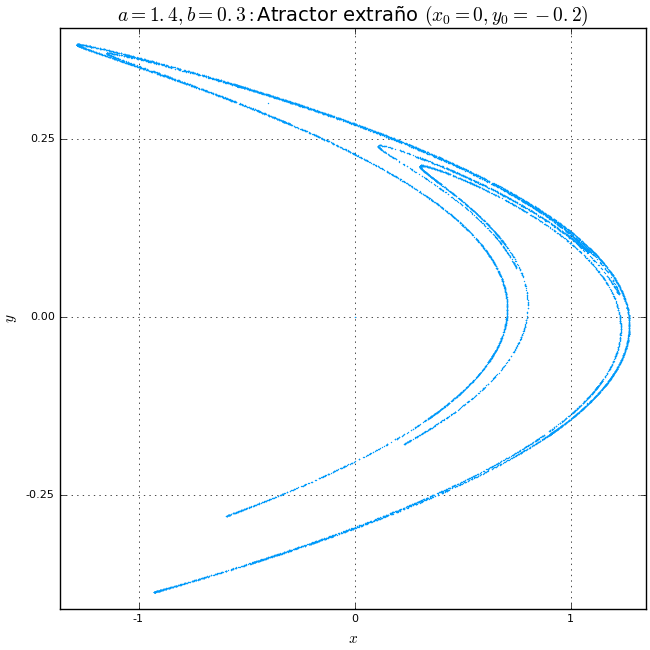

In [21]:
scatter(xx,yy,ms=1,markerstrokecolor=false,label="",size=(650,650))
xlabel!(L"x")
ylabel!(L"y")
title!(L"$a=1.4,b=0.3:$Atractor extraño $(x_0=0,y_0=-0.2)$")

De acuerdo a lo descrito en el artículo de Hénon [1], este atractor extraño es el producto de una línea en el plano $XY$  y un conjunto de Cantor.




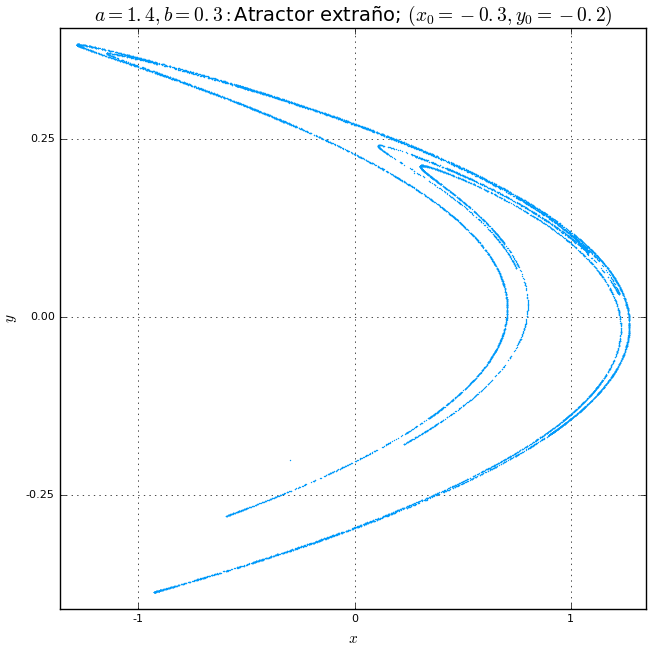

In [22]:
x0=-0.3
y0=-0.2
a=1.4
b=0.3
N=10000
xx,yy=iter_Henon(x0, y0, a, b, N);
scatter(xx,yy,ms=1,markerstrokecolor=false,label="",size=(650,650))
xlabel!(L"x")
ylabel!(L"y")
title!(L"$a=1.4,b=0.3:$Atractor extraño; $(x_0=-0.3,y_0=-0.2)$")

 ## Caso conservativo $a=1.4,b=-1$
 
 Aquí hay que escoger una condición inicial que converja. De acuerdo al conjunto de Julia:


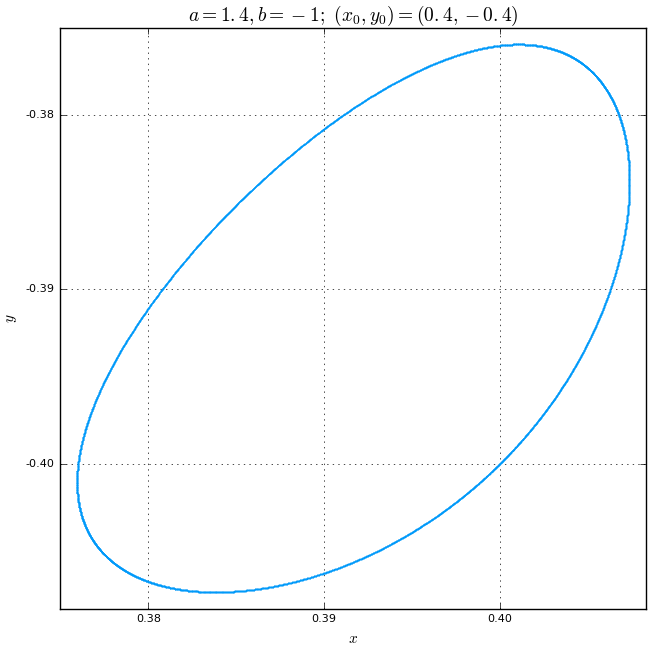

In [23]:
x0=0.4
y0=-0.4
a=1.4
b=-1
N=10000
xx,yy=iter_Henon(x0, y0, a, b, N);
scatter(xx,yy,ms=1,markerstrokecolor=false,label="",size=(650,650))
xlabel!(L"x")
ylabel!(L"y")
title!(L"$a=1.4,b=-1; \ (x_0,y_0)=(0.4,-0.4)$")

Vemos que es una órbita periódica cerrada. Pintemos más órbitas para el caso conservativo pero para distintos parámetros $a$. En cada caso se buscaron las condiciones iniciales que convergen con ayuda de los conjuntos de Julia o tomando un punto muy cercano al punto fijo.


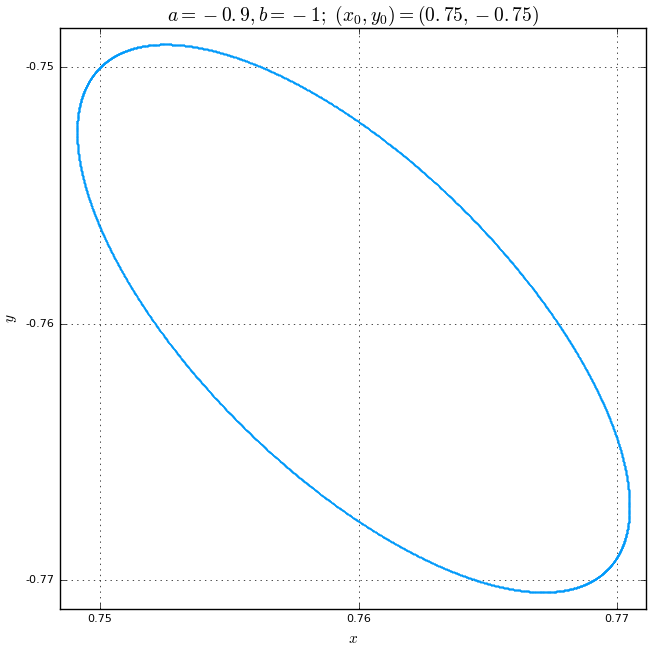

In [24]:
x0=0.75
y0=-0.75
a=-0.9
b=-1
N=10000
xx,yy=iter_Henon(x0, y0, a, b, N);
scatter(xx,yy,ms=1,markerstrokecolor=false,label="",size=(650,650))
xlabel!(L"x")
ylabel!(L"y")
title!(L"$a=-0.9,b=-1; \ (x_0,y_0)=(0.75,-0.75)$")


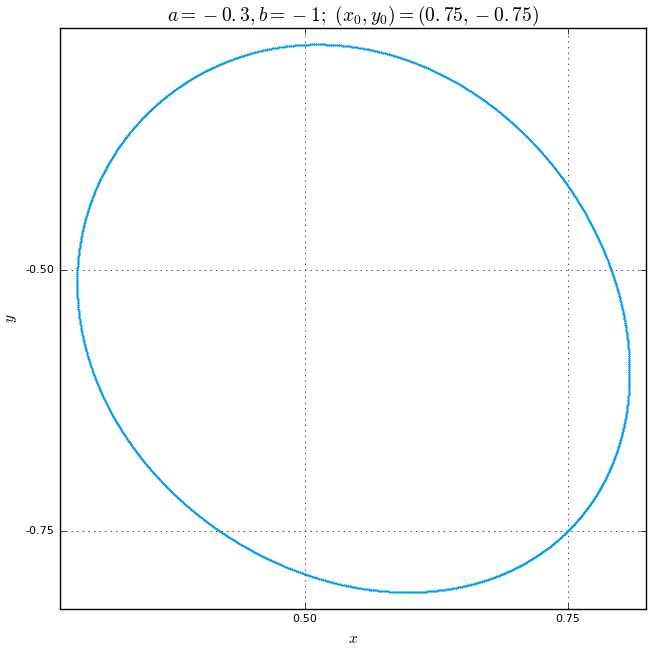

In [25]:
x0=0.75
y0=-0.75
a=-0.3
b=-1
N=10000
xx,yy=iter_Henon(x0, y0, a, b, N);
scatter(xx,yy,ms=1,markerstrokecolor=false,label="",size=(650,650))
xlabel!(L"x")
ylabel!(L"y")
title!(L"$a=-0.3,b=-1; \ (x_0,y_0)=(0.75,-0.75)$")

In [26]:
Fixed_points(1,-1)

((0.41421356237309515,-0.41421356237309515),(-2.414213562373095,2.414213562373095))


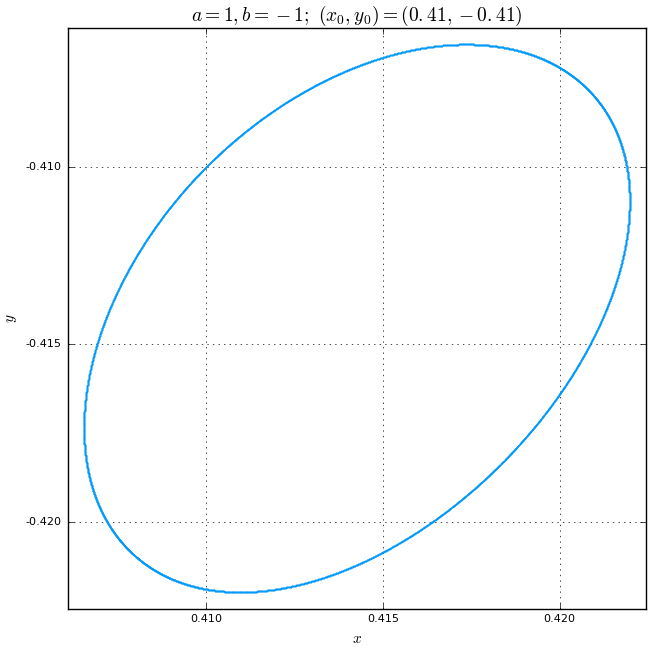

In [27]:
x0=0.41
y0=-0.41
a=1
b=-1
N=10000
xx,yy=iter_Henon(x0, y0, a, b, N);
scatter(xx,yy,ms=1,markerstrokecolor=false,label="",size=(650,650))
xlabel!(L"x")
ylabel!(L"y")
title!(L"$a=1,b=-1; \ (x_0,y_0)=(0.41,-0.41)$")


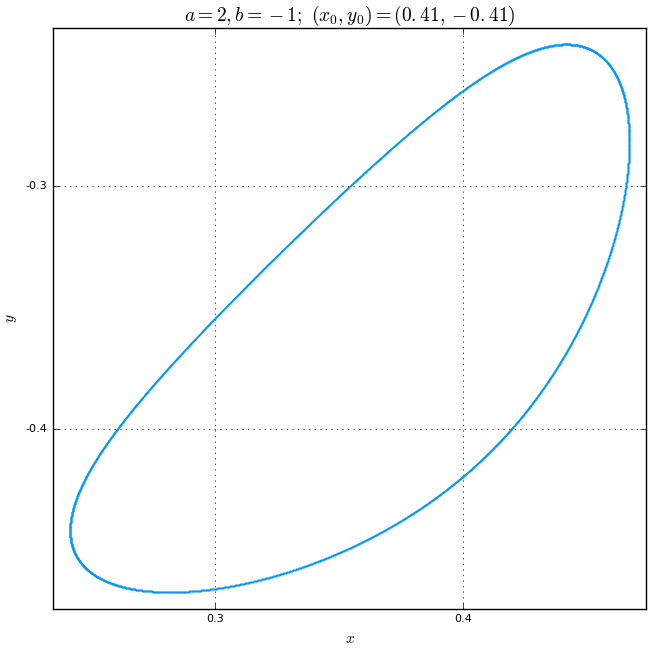

In [28]:
x0=0.41
y0=-0.41
a=2
b=-1
N=10000
xx,yy=iter_Henon(x0, y0, a, b, N);
scatter(xx,yy,ms=1,markerstrokecolor=false,label="",size=(650,650))
xlabel!(L"x")
ylabel!(L"y")
title!(L"$a=2,b=-1; \ (x_0,y_0)=(0.41,-0.41)$")

In [29]:
Fixed_points(3,-1)

((0.3333333333333333,-0.3333333333333333),(-1.0,1.0))


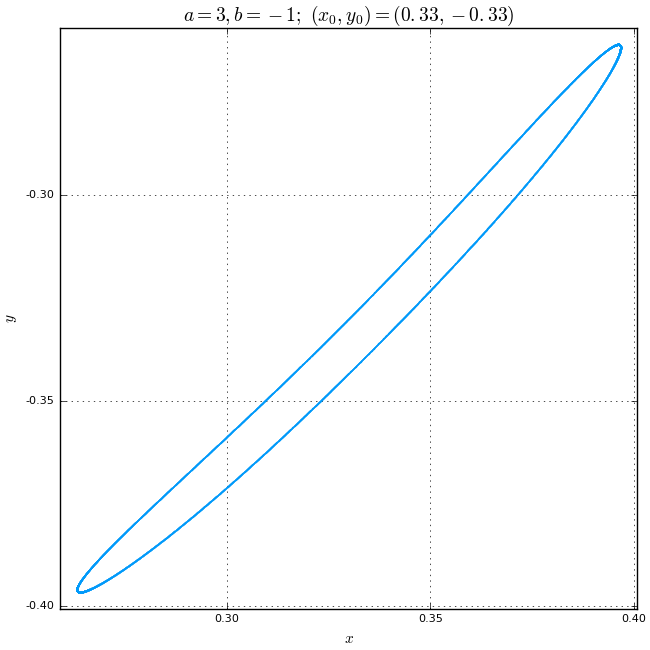

In [30]:
x0=0.33
y0=-0.33
a=3
b=-1
N=10000
xx,yy=iter_Henon(x0, y0, a, b, N);
scatter(xx,yy,ms=1,markerstrokecolor=false,label="",size=(650,650))
xlabel!(L"x")
ylabel!(L"y")
title!(L"$a=3,b=-1; \ (x_0,y_0)=(0.33,-0.33)$")

In [31]:
x0=x1f[1]
y0=x1f[2]
x1f,x2f=Fixed_points(a,b)

LoadError: LoadError: UndefVarError: x1f not defined
while loading In[31], in expression starting on line 1


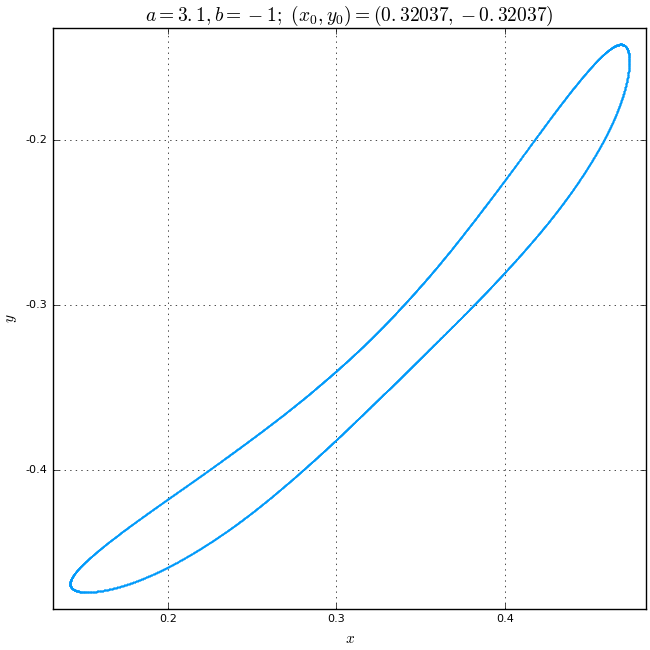

In [32]:
a=3.1
b=-1
x0=0.32037
y0=-x0

N=10000
xx,yy=iter_Henon(x0, y0, a, b, N);
scatter(xx,yy,ms=1,markerstrokecolor=false,label="",size=(650,650))
xlabel!(L"x")
ylabel!(L"y")
title!(L"$a=3.1,b=-1; \ (x_0,y_0)=(0.32037,-0.32037)$")

# Bifurcaciones y coeficientes de Feigenbaum.

Al igual que en el caso unidimensional, se estudia el tipo de órbitas que se obienen al variar un parámetro del mapeo. En este trabajo dejaermos fijo el parámetro $b$ y variaremos el parámetro $a$ dentro de un intervalo adecuado. Definamos las funciones que utlizaremos para pintar el diagrama de bifurcaciones, medir las longitudes de las órbitas, encontrar los puntos de bifurcación y calcular los coeficientes de Feigenbaum.

# Caso b=0.3

In [33]:
"""Funcion que devuelve un arreglo `diagBif´ con los últimos Nlast iterados de un mapeo f(x,c),
en donde c es un párametro. También devuelve un arreglo `cs´ que permite graficar el diagrama
de bifurcaciones
Los parámetros de entrada son los siguientes: 
-) f(x,c): la función a evaluar
-) crange: rango en el que se tomaran los valores del parámetro c
-) M: el número de iteraciones del mapeo
-) x0: la condición inicial
-) Nlast: los últimos iterados que se desea iterar para obtener las orbitas del diagrama de 
bifurcaciones
"""
function Bif_diag(Arange,M,x0,y0,b,Nlast)
diagBifX=Float64[]
diagBifY=Float64[]
As=Float64[]
    for a in Arange
        x=x0
        y=y0
        for i in 1:M
        x,y=Henon_map(x,y,a,b)
        end 
        for i in 1:Nlast
            push!(As,a)
            x,y=Henon_map(x, y, a, b)
            push!(diagBifX,x)
            push!(diagBifY,y)
        end
    end
    return As,diagBifX,diagBifY
end 

Bif_diag (generic function with 1 method)

In [435]:
"""esta función calcula la longitud de la orbita solamente en las X de la iteración del 
mapeo de Hénon a partir de una condición inicial (x0,y0) y dos parámetros (a,b). La función 
itera Norb veces la condición inicial y a partir de ahí ve los valores distintos 
de las x_{n+i} para determinar la longitud de la orbita en as X.
"""
function orbit_lengthX(x0,y0,a,b,Norb)
    HenAB(x,y)=Henon_map(x,y,a,b)
    x=x0
    y=y0
    tol=1e-8
    cont=1
    for i in 1:Norb
        x,y=HenAB(x,y)
    end 
    xf=x
    yf=y
    xorbit,yorbit=HenAB(xf,yf)
    while abs(xf-xorbit)>tol
        cont=cont+1
        #xf=xorbit
        xorbit,yorbit=HenAB(xorbit,yorbit)   
        if cont>1024+1
            #println("numero de iterados insuficiente")
            break
        end 
    end 
    return cont
end 
"""esta función calcula la longitud de la orbita solamente en las Y de la iteración del 
mapeo de Hénon a partir de una condición inicial (x0,y0) y dos parámetros (a,b). La función 
itera Norb veces la condición inicial y a partir de ahí ve los valores distintos 
de las y_{n+i} para determinar la longitud de la orbita en as Y.
"""
function orbit_lengthY(x0,y0,a,b,Norb)
    HenAB(x,y)=Henon_map(x,y,a,b)
    x=x0
    y=y0
    tol=1e-10
    cont=1
    for i in 1:Norb
        x,y=HenAB(x,y)
    end 
    xf=x
    yf=y
    xorbit,yorbit=HenAB(xf,yf)
    while abs(yf-yorbit)>tol
        cont=cont+1
        xorbit,yorbit=HenAB(xorbit,yorbit)   
        if cont>6*1024+1
            #println("numero de iterados insuficiente")
            break
        end 
    end 
    return cont
end 


      
      

orbit_lengthY (generic function with 1 method)

In [420]:
b=0.3
a0=-1/4*(1-b)^2
Arange=a0:1/2^10:1.41
M=100000
Nlast=200
x0=0.
y0=0.
as,xbif,ybif=Bif_diag(Arange, M, x0, y0, b, Nlast) ; #revisar la funcion Bif diag para hacerla 
#mas rapida;


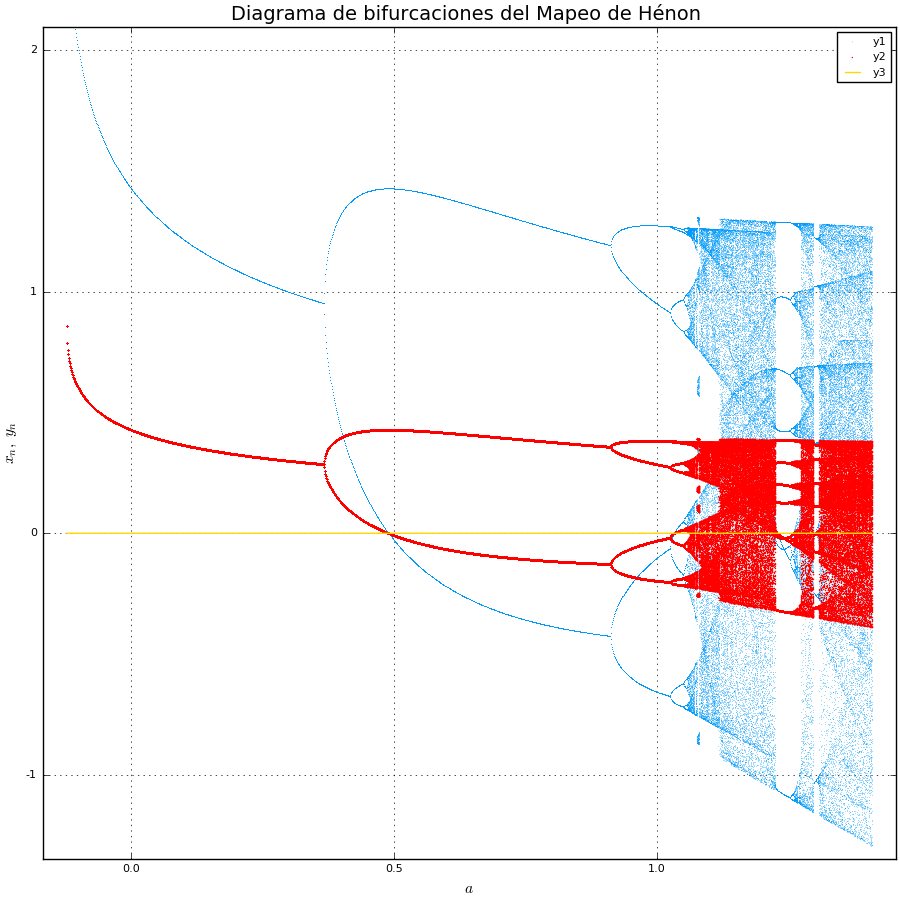

In [424]:
scatter(as,xbif, markersize=0.5,markerstrokecolor=false,size=(900,900))#,xlim=(1,1.1))
scatter!(as,ybif,markersize=1,markerstrokecolor=false,color=:red)
plot!(as,zeros(length(as)),c=:gold,ylim=(-1.25,2))

#(0.36597228673036497,0.366084517823527)
#(0.36735732327485593,0.3673686471347857)
#plot!([0.3673686471347857,0.3673686471347857],[-1,1.5])
#plot!([0,1.4],[0.952473, 0.952473])
xlabel!(L"a")
ylabel!(L"x_n, \ y_n")
title!("Diagrama de bifurcaciones del Mapeo de Hénon ")


In [355]:
"""funcion que determina (si es que existe) el punto de bifurcación (en la variable x o en la 
variable y) del mapeo de Henon.
entre dos valores de parámetro a1 y a2 con Norb iteraciones a partir de la condicion inicial
(x0,y0)
En caso de existir bifurcación, la función devuelve el valor del parámetro 
'Ab' en donde se presenta la bifurcación
NOTA: Funciona mejor con Norb>1000000"""

function point_bifX(x0,y0,b,a1,a2,Norb)
     tol=1e-14
    L1x=orbit_lengthX(x0, y0, a1, b, Norb)
    L2x=orbit_lengthX(x0, y0, a2, b, Norb)
   # while L1x>1024 || L2x>1024
    #    Norb=10Norb
     #    L1x=orbit_lengthX(x0, y0, a1, b, Norb)
      #  L2x=orbit_lengthX(x0, y0, a2, b, Norb)
    #end 
    c1=a1
    c2=a2
        if L1x==L2x#para las X's
            nothing
        else
            while abs(c1-c2)>tol
            cmed=(c1+c2)/2
            LmedX=orbit_lengthX(x0, y0, cmed, b, Norb) 
            if LmedX==L1x
                c1=cmed
                L1x=orbit_lengthX(x0, y0, c1, b, Norb) 
                else LmedX==L2x
                c2=cmed
                L2x=orbit_lengthX(x0,y0,c2,b,Norb)
            end  
            end
    end 
    #cbX=(c1+c2)/2
    
    
    
    return c2

end 

point_bifX (generic function with 2 methods)

In [301]:
"""funcion que determina (si es que existe) el punto de bifurcación (en la variable x o en la 
variable y) del mapeo de Henon.
entre dos valores de parámetro a1 y a2 con Norb iteraciones a partir de la condicion inicial
(x0,y0)
En caso de existir bifurcación, la función devuelve el valor del parámetro 
'Ab' en donde se presenta la bifurcación
NOTA: Funciona mejor con Norb>1000000"""

function point_bifY(x0,y0,b,a1,a2,Norb)
     tol=1e-14
    L1y=orbit_lengthY(x0, y0, a1, b, Norb)
    L2y=orbit_lengthY(x0, y0, a2, b, Norb)
   # while L1x>1024 || L2x>1024
    #    Norb=10Norb
     #    L1x=orbit_lengthX(x0, y0, a1, b, Norb)
      #  L2x=orbit_lengthX(x0, y0, a2, b, Norb)
    #end 
    c1=a1
    c2=a2
    if L1y==L2y#para las X's
            nothing
        else
            while abs(c1-c2)>tol
            cmed=(c1+c2)/2
            LmedY=orbit_lengthY(x0, y0, cmed, b, Norb) 
            if LmedY==L1y
                c1=cmed
                L1y=orbit_lengthY(x0, y0, c1, b, Norb) 
                else LmedY==L2y
                c2=cmed
                L2y=orbit_lengthY(x0,y0,c2,b,Norb)
            end  
            end
    end 
    #cbX=(c1+c2)/2
    
    
    
    return c2

end 

point_bifY (generic function with 1 method)

In [436]:

"""Nota el step debe ser pequeño, del orden de 0.01 o menor dependiendo del parametro inicial
a0 que se le ingresó por argumento"""

function find_bifpointsX(x0,y0,b,a0,step,Norb)
    bifSx=[]
    #bifsy=[]
for i in 1:9
    step=step/i
    L0=orbit_lengthX(x0, y0, a0, b, Norb)
    a1=a0+step
    L1=orbit_lengthX(x0,y0,a1,b,Norb)
    while L0 == L1
        a1=a1+step
        #println(a1)
        L1=orbit_lengthX(x0,y0,a1,b,Norb)
    end 
    a0new=a1-step
    bifx=point_bifX(x0, y0, a0new,a1, Norb) 
    push!(bifSx,bifx)
    
    a0=a1
end 
    return bifSx
        
end 

"""Nota el step debe ser pequeño, del orden de 0.01 o menor dependiendo del parametro inicial
a0 que se le ingresó por argumento"""

function find_bifpointsY(x0,y0,b,a0,step,Norb)
    bifSy=[]
    #bifsy=[]
for i in 1:9
    step=step/i
    L0=orbit_lengthY(x0, y0, a0, b, Norb)
    a1=a0+step
    L1=orbit_lengthY(x0,y0,a1,b,Norb)
    while L0 == L1
        a1=a1+step
        #println(a1)
        L1=orbit_lengthY(x0,y0,a1,b,Norb)
    end 
    a0new=a1-step
        bify=point_bifY(x0,y0,b,a0new,a1,Norb) 
        push!(bifSy,bify)
    
    a0=a1
end 
    return bifSy
        
end 
        

find_bifpointsY (generic function with 1 method)

In [437]:
"""Función que calcula los parámetros de Feigenbaum con los puntos superestables dados 
en un arreglo cs"""
function fn_ratio(cn)
    fn=Float64[]
    for i in 1:length(cn)-2
        ratio=(cn[i]-cn[i+1])/(cn[i+1]-cn[i+2])
        push!(fn,ratio)
    end 
    return fn
end


fn_ratio (generic function with 1 method)

In [378]:
x0=0.0
y0=0.0
a0=0.3
b=0.3
step=0.01
Norb=100000
@time BIFSX=find_bifpointsX(x0, y0, b, a0, step, Norb) 

 58.245969 seconds (756.23 M allocations: 18.027 GB, 17.24% gc time)


9-element Array{Any,1}:
 0.367357
 0.912435
 1.02583 
 1.05111 
 1.05656 
 1.05773 
 1.05798 
 1.05803 
 1.05805 

In [426]:
FeigsX=fn_ratio(BIFS);

In [429]:
push!(FeigsX,0);

In [411]:
x0=0.0
y0=0.0
a0=0.3
b=0.3
step=0.01
Norb=100000
@time BIFSY=find_bifpointsY(x0, y0,b, a0, step, Norb) ;

 41.421048 seconds (573.97 M allocations: 13.676 GB, 16.97% gc time)


9-element Array{Any,1}:
 0.367326
 0.912421
 1.02582 
 1.05111 
 1.05656 
 1.05773 
 1.05798 
 1.05798 
 1.05798 

In [430]:
FeigsY=fn_ratio(BIFS);


In [432]:
push!(FeigsY,0);

In [433]:
Bifs_X = DataFrame(n = ["1","2","3","4","5","6","7","8","9"], 
C_n = BIFSX[:], f_n =  FeigsX[:])

,n,C_n,f_n
1,1,0.36732551037078365,4.806989877151212
2,2,0.9124214000254784,4.484423529494429
3,3,1.0258246092067658,4.6430514919668795
4,4,1.0511108361158228,4.655511855755535
5,5,1.0565582789356451,4.662120389359438
6,6,1.0577287441427878,4.645759573974416
7,7,1.0579799930633245,4.65073372824631
8,8,1.0579804118748803,0.0
9,9,1.0579810857232619,0.0


In [434]:
Bifs_Y = DataFrame(n = ["1","2","3","4","5","6","7","8","9"], 
C_n = BIFSY[:], f_n =  FeigsY[:])

,n,C_n,f_n
1,1,0.36732551037078365,4.806989877151212
2,2,0.9124214000254784,4.484423529494429
3,3,1.0258246092067658,4.6430514919668795
4,4,1.0511108361158228,4.655511855755535
5,5,1.0565582789356451,4.662120389359438
6,6,1.0577287441427878,4.645759573974416
7,7,1.0579799930633245,4.65073372824631
8,8,1.0579804118748803,0.0
9,9,1.0579810857232619,0.0
